In [1]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Let's make some random data

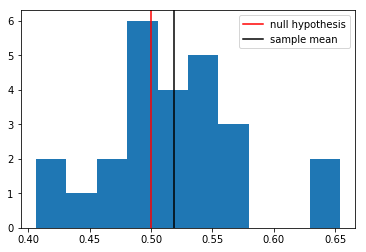

In [2]:
# normal distribution data, mean = 1.5, std = 0.7
data_normal = np.random.normal(0.52, 0.06, size=25)
_=plt.hist(data_normal)
_=plt.axvline(0.5,color='red',label='null hypothesis')
_=plt.axvline(np.mean(data_normal),color='black',label='sample mean')
_=plt.legend()

## parametric one sample t test with scipy

In [3]:
stats.ttest_1samp(data_normal,0.5,)

Ttest_1sampResult(statistic=1.606474548123608, pvalue=0.1212482642772984)

## nonparametric one sample t test (wilcox) with scipy 

In [4]:
stats.wilcoxon(data_normal-0.5,correction=True)

WilcoxonResult(statistic=101.0, pvalue=0.10073067103920605)

## nonparametric one sample t

In [5]:
def resample_ttest(x,baseline=0.5,n_ps=100,n_permutation=5000):
    # one tail comparison only
    import numpy as np
    experiment = np.mean(x) # the mean of the observations in the experiment
    experiment_diff = x - np.mean(x) + baseline # shift the mean to the baseline but keep the distribution
    newexperiment = np.mean(experiment_diff) # just look at the new mean and make sure it is at the baseline
    # simulate/bootstrap null hypothesis distribution
    # 1st-D := number of sample same as the experiment
    # 2nd-D := within one permutation resamping, we perform resampling same as the experimental samples,
    # but also repeat this one sampling n_permutation times
    # 3rd-D := repeat 2nd-D n_ps times to obtain a distribution of p values later
    temp = np.random.choice(experiment_diff,size=(x.shape[0],n_permutation,n_ps),replace=True)
    temp = temp.mean(0)# take the mean over the sames because we only care about the mean of the null distribution
    # along each row of the matrix (n_row = n_permutation), we count instances that are greater than the observed mean of the experiment
    # compute the proportion, and we get our p values
    ps = (np.sum(temp >= np.mean(x),axis=0)+1.) / (n_permutation + 1.)
    return ps

In [6]:
ps = resample_ttest(data_normal,0.5)

(array([ 3.,  6.,  9., 17., 16., 14., 11., 16.,  5.,  3.]),
 array([0.04639072, 0.04775045, 0.04911018, 0.05046991, 0.05182963,
        0.05318936, 0.05454909, 0.05590882, 0.05726855, 0.05862827,
        0.059988  ]),
 <a list of 10 Patch objects>)

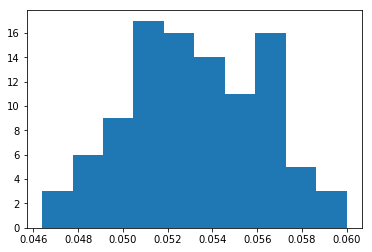

In [7]:
plt.hist(ps)

# now let's do the extract same thing with data from different distributions

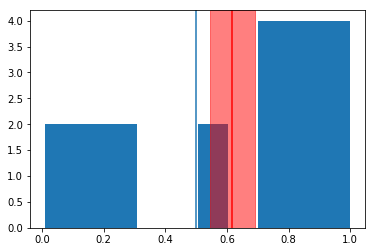

In [8]:
# make beta distributed data whose mean is close to 0
data = np.random.beta(0.8,0.5,size=20)
_=plt.hist(data)
_=plt.axvline(0.5,label='null hypothesis')
_=plt.axvline(np.mean(data),color='red',label='sample mean')
_=plt.axvspan(np.mean(data)-np.std(data)/np.sqrt(data.size),
             np.mean(data)+np.std(data)/np.sqrt(data.size),
             color='red',alpha=0.5)

In [9]:
stats.ttest_1samp(data,0.5)

Ttest_1sampResult(statistic=1.5942366685478095, pvalue=0.12738278770674097)

In [10]:
stats.wilcoxon(data-0.5)

WilcoxonResult(statistic=64.0, pvalue=0.12585852473931722)

(array([ 5.,  8., 14., 16., 19., 20., 11.,  5.,  0.,  2.]),
 array([0.039992  , 0.04155169, 0.04311138, 0.04467107, 0.04623075,
        0.04779044, 0.04935013, 0.05090982, 0.05246951, 0.05402919,
        0.05558888]),
 <a list of 10 Patch objects>)

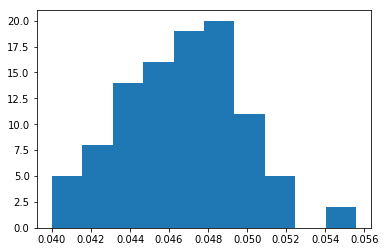

In [11]:
ps = resample_ttest(data,0.5)
plt.hist(ps)